### Limpeza de dados

In [347]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from io import StringIO

In [3]:
emprestimo = pd.read_csv('/content/drive/MyDrive/Alura - dataset/emprestimo.csv')
dados_exemplares = pd.read_csv('/content/drive/MyDrive/Alura - dataset/dados_exemplares.csv')

In [4]:
matricula_alunos = pd.read_csv('/content/drive/MyDrive/Alura - dataset/matricula_alunos.csv')
usuarios = pd.read_csv('/content/drive/MyDrive/Alura - dataset/usuarios.csv')

In [5]:
emprestimo.shape

(2258018, 8)

In [6]:
emprestimo.drop_duplicates().shape

(2258018, 8)

In [7]:
dados_exemplares.shape

(546237, 8)

In [8]:
dados_exemplares.drop_duplicates().shape

(546237, 8)

In [9]:
matricula_alunos.shape


(7726, 4)

In [10]:
matricula_alunos.drop_duplicates().shape


(7726, 4)

In [11]:
usuarios.shape

(62802, 4)

In [12]:
usuarios.drop_duplicates().shape

(62802, 4)

In [13]:
emprestimo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2258018 entries, 0 to 2258017
Data columns (total 8 columns):
 #   Column                Dtype  
---  ------                -----  
 0   Unnamed: 0            int64  
 1   id_emprestimo         int64  
 2   codigo_barras         object 
 3   data_renovacao        object 
 4   data_emprestimo       object 
 5   data_devolucao        object 
 6   matricula_ou_siape    float64
 7   tipo_vinculo_usuario  object 
dtypes: float64(1), int64(2), object(5)
memory usage: 137.8+ MB


In [14]:
# removendo coluna desnecessária
emprestimo.drop(columns='Unnamed: 0', inplace=True)

In [15]:
dados_exemplares.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 546237 entries, 0 to 546236
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   index             546237 non-null  int64 
 1   id_exemplar       546237 non-null  int64 
 2   codigo_barras     546237 non-null  object
 3   colecao           546237 non-null  object
 4   biblioteca        546237 non-null  object
 5   status_material   546237 non-null  object
 6   localizacao       546237 non-null  int64 
 7   registro_sistema  546237 non-null  int64 
dtypes: int64(4), object(4)
memory usage: 33.3+ MB


In [16]:
dados_exemplares.drop(columns='registro_sistema', inplace=True)
dados_exemplares.drop(columns='index', inplace=True)

#### Materiais x Utilização

In [17]:
# unificando todos os dados
emprestimo_exemplares = emprestimo.merge(dados_exemplares, how = 'left')

In [18]:
emprestimo_exemplares.isnull().sum()

id_emprestimo                 0
codigo_barras                 0
data_renovacao          1287963
data_emprestimo               0
data_devolucao             6484
matricula_ou_siape         3171
tipo_vinculo_usuario          0
id_exemplar              189258
colecao                  189258
biblioteca               189258
status_material          189258
localizacao              189258
dtype: int64

In [19]:
emprestimo_exemplares.isnull().query('localizacao == True')

,id_emprestimo,codigo_barras,data_renovacao,data_emprestimo,data_devolucao,matricula_ou_siape,tipo_vinculo_usuario,id_exemplar,colecao,biblioteca,status_material,localizacao
23,False,False,False,False,False,False,False,True,True,True,True,True
116,False,False,True,False,False,False,False,True,True,True,True,True
127,False,False,False,False,False,False,False,True,True,True,True,True
136,False,False,False,False,False,False,False,True,True,True,True,True
137,False,False,False,False,False,False,False,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2261712,False,False,True,False,False,False,False,True,True,True,True,True
2261721,False,False,True,False,False,False,False,True,True,True,True,True
2261737,False,False,False,False,True,False,False,True,True,True,True,True
2261740,False,False,True,False,False,False,False,True,True,True,True,True


In [20]:
emprestimo_exemplares.head()

,id_emprestimo,codigo_barras,data_renovacao,data_emprestimo,data_devolucao,matricula_ou_siape,tipo_vinculo_usuario,id_exemplar,colecao,biblioteca,status_material,localizacao
0,709684,L095049,NaN,2010/01/04 07:44:10.721000000,2010/01/05 16:26:12.662000000,2.008023e+09,ALUNO DE GRADUAÇÃO,13259.0,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,630.0
1,709685,L167050,NaN,2010/01/04 07:44:10.750000000,2010/01/12 07:34:13.934000000,2.008023e+09,ALUNO DE GRADUAÇÃO,70865.0,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,647.0
2,709686,2006017618,2010/01/26 08:07:01.738000000,2010/01/04 08:08:44.081000000,2010/02/25 07:36:25.800000000,2.008112e+09,ALUNO DE PÓS-GRADUAÇÃO,195347.0,Acervo Circulante,Biblioteca Setorial Prof. Rodolfo Helinski - E...,REGULAR,640.0
3,709687,L184117,2010/01/18 11:07:46.470000000,2010/01/04 08:24:21.284000000,2010/02/03 08:58:45.692000000,2.007211e+08,ALUNO DE GRADUAÇÃO,131639.0,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,609.0
4,709684,L095049,NaN,2010/01/04 07:44:10.721000000,2010/01/05 16:26:12.662000000,2.008023e+09,ALUNO DE GRADUAÇÃO,13259.0,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,630.0


In [21]:
emprestimo_exemplares.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2261816 entries, 0 to 2261815
Data columns (total 12 columns):
 #   Column                Dtype  
---  ------                -----  
 0   id_emprestimo         int64  
 1   codigo_barras         object 
 2   data_renovacao        object 
 3   data_emprestimo       object 
 4   data_devolucao        object 
 5   matricula_ou_siape    float64
 6   tipo_vinculo_usuario  object 
 7   id_exemplar           float64
 8   colecao               object 
 9   biblioteca            object 
 10  status_material       object 
 11  localizacao           float64
dtypes: float64(3), int64(1), object(8)
memory usage: 224.3+ MB


##### Criando coluna CDU

In [22]:
emprestimo_exemplares['localizacao'].fillna(value = -1, inplace= True)

In [312]:
CDU_lista = []
for CDU in emprestimo_exemplares['localizacao']:
  if(CDU < 100):
    CDU_lista.append('Generalidades')
  elif(CDU < 200):
    CDU_lista.append('Filosofia e psicologia')
  elif(CDU < 300):
    CDU_lista.append('Religião')
  elif(CDU < 400):
    CDU_lista.append('Ciências sociais')
  elif(CDU < 500):
    CDU_lista.append('Classe vaga')
  elif(CDU < 600):
    CDU_lista.append('Matemática e ciências naturais')
  elif(CDU < 700):
    CDU_lista.append('Ciências aplicadas')
  elif(CDU < 800):
    CDU_lista.append('Belas artes')
  elif(CDU < 900):
    CDU_lista.append('Linguagem')
  else:
    CDU_lista.append('Geografia. Biografia. História.')

emprestimo_exemplares['CDU'] = CDU_lista

In [313]:
emprestimo_exemplares.query('localizacao == 199')

,id_emprestimo,codigo_barras,data_renovacao,data_emprestimo,data_devolucao,matricula_ou_siape,tipo_vinculo_usuario,id_exemplar,colecao,biblioteca,status_material,localizacao,CDU
27125,736812,2007026015,2010-03-28 11:43:16.903,2010-03-15 21:18:03.314,2010-04-05 20:11:24.155,2009025229.0,ALUNO DE GRADUAÇÃO,99183.0,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,199.0,Filosofia e psicologia
40324,750048,2007026015,NaT,2010-04-05 21:15:43.472,2010-04-26 20:42:17.053,2011050908.0,ALUNO DE GRADUAÇÃO,99183.0,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,199.0,Filosofia e psicologia
55566,765301,2007026015,NaT,2010-04-28 18:14:25.834,2010-05-13 17:35:14.031,2009024923.0,ALUNO DE GRADUAÇÃO,99183.0,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,199.0,Filosofia e psicologia
65035,774784,2007026015,NaT,2010-05-13 21:22:02.679,2010-05-28 19:06:08.638,2009025830.0,ALUNO DE GRADUAÇÃO,99183.0,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,199.0,Filosofia e psicologia
74379,784147,2007026015,NaT,2010-05-28 19:32:26.432,2010-06-16 20:26:34.000,2009026012.0,ALUNO DE GRADUAÇÃO,99183.0,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,199.0,Filosofia e psicologia
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2245549,2972855,2014035233,2020-03-06 14:34:24.524,2020-02-20 11:25:11.517,2020-12-17 08:44:29.000,20170097896.0,ALUNO DE GRADUAÇÃO,1139905.0,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,199.0,Filosofia e psicologia
2246026,2973330,2014076880,NaT,2020-02-20 16:27:23.427,2020-03-04 12:26:21.000,20190006146.0,ALUNO DE GRADUAÇÃO,1169812.0,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,199.0,Filosofia e psicologia
2248952,2976247,2013088081,NaT,2020-02-28 10:24:05.517,2020-03-02 18:37:43.000,20170087290.0,ALUNO DE GRADUAÇÃO,1107026.0,Acervo Circulante,Biblioteca Setorial Dr. Paulo Bezerra - EMCM/R...,REGULAR,199.0,Filosofia e psicologia
2249187,2976482,2014082886,2020-03-15 19:50:58.864,2020-02-28 12:59:07.459,2020-03-17 12:57:14.000,20180120183.0,ALUNO DE GRADUAÇÃO,1171759.0,Acervo Circulante,Biblioteca Setorial Prof. Rodolfo Helinski - E...,REGULAR,199.0,Filosofia e psicologia


## Convertendo os demais dados

In [323]:
emprestimo_exemplares['data_renovacao'] = pd.to_datetime(emprestimo_exemplares.loc[:,'data_renovacao'], format="%Y/%m/%d %H:%M:%S", exact= False, errors='coerce')
emprestimo_exemplares['data_devolucao'] = pd.to_datetime(emprestimo_exemplares['data_devolucao'], format="%Y/%m/%d %H:%M:%S", exact= False, errors='coerce')
emprestimo_exemplares['data_emprestimo'] = pd.to_datetime(emprestimo_exemplares['data_emprestimo'],  format="%Y/%m/%d %H:%M:%S", exact= False, errors='coerce')

In [314]:
# Transformando colunas para string
emprestimo_exemplares['id_emprestimo'] = emprestimo_exemplares['id_emprestimo'].astype(str)
emprestimo_exemplares["id_exemplar"] = emprestimo_exemplares["id_exemplar"].astype(str)
emprestimo_exemplares['localizacao'] = emprestimo_exemplares['localizacao'].astype(str)
emprestimo_exemplares['matricula_ou_siape'] = emprestimo_exemplares['matricula_ou_siape'].astype(str)

In [28]:
emprestimo_exemplares.head()

,id_emprestimo,codigo_barras,data_renovacao,data_emprestimo,data_devolucao,matricula_ou_siape,tipo_vinculo_usuario,id_exemplar,colecao,biblioteca,status_material,localizacao,CDU
0,709684,L095049,NaT,2010-01-04 07:44:10.721,2010-01-05 16:26:12.662,2008023265.0,ALUNO DE GRADUAÇÃO,13259.0,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,630.0,Geografia. Biografia. História
1,709685,L167050,NaT,2010-01-04 07:44:10.750,2010-01-12 07:34:13.934,2008023265.0,ALUNO DE GRADUAÇÃO,70865.0,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,647.0,Geografia. Biografia. História
2,709686,2006017618,2010-01-26 08:07:01.738,2010-01-04 08:08:44.081,2010-02-25 07:36:25.800,2008112114.0,ALUNO DE PÓS-GRADUAÇÃO,195347.0,Acervo Circulante,Biblioteca Setorial Prof. Rodolfo Helinski - E...,REGULAR,640.0,Geografia. Biografia. História
3,709687,L184117,2010-01-18 11:07:46.470,2010-01-04 08:24:21.284,2010-02-03 08:58:45.692,200721119.0,ALUNO DE GRADUAÇÃO,131639.0,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,609.0,Geografia. Biografia. História
4,709684,L095049,NaT,2010-01-04 07:44:10.721,2010-01-05 16:26:12.662,2008023265.0,ALUNO DE GRADUAÇÃO,13259.0,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,630.0,Geografia. Biografia. História


In [29]:
emprestimo_exemplares.isnull().sum()

id_emprestimo                 0
codigo_barras                 0
data_renovacao          1287963
data_emprestimo               0
data_devolucao             6484
matricula_ou_siape            0
tipo_vinculo_usuario          0
id_exemplar                   0
colecao                  189258
biblioteca               189258
status_material          189258
localizacao                   0
CDU                           0
dtype: int64

In [30]:
# preenchendo dados nulos na coluna matricula_ou_siape
emprestimo_exemplares['colecao'].fillna(value=0, inplace=True)
emprestimo_exemplares['biblioteca'].fillna(value=0, inplace=True)
emprestimo_exemplares['status_material'].fillna(value=0, inplace=True)

In [31]:
emprestimo_exemplares.isnull().sum()

id_emprestimo                 0
codigo_barras                 0
data_renovacao          1287963
data_emprestimo               0
data_devolucao             6484
matricula_ou_siape            0
tipo_vinculo_usuario          0
id_exemplar                   0
colecao                       0
biblioteca                    0
status_material               0
localizacao                   0
CDU                           0
dtype: int64

In [56]:
emprestimo_exemplares.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2261816 entries, 0 to 2261815
Data columns (total 13 columns):
 #   Column                Dtype         
---  ------                -----         
 0   id_emprestimo         object        
 1   codigo_barras         object        
 2   data_renovacao        datetime64[ns]
 3   data_emprestimo       datetime64[ns]
 4   data_devolucao        datetime64[ns]
 5   matricula_ou_siape    object        
 6   tipo_vinculo_usuario  object        
 7   id_exemplar           object        
 8   colecao               object        
 9   biblioteca            object        
 10  status_material       object        
 11  localizacao           object        
 12  CDU                   object        
dtypes: datetime64[ns](3), object(10)
memory usage: 241.6+ MB


### Análise

#### Quantos empréstimos foram realizados ao total?

In [45]:
emprestimo_exemplares['id_emprestimo'].value_counts()

709705     7
709704     7
2595954    3
2049407    3
2010326    3
          ..
1477482    1
1477481    1
1477480    1
1477479    1
2989090    1
Name: id_emprestimo, Length: 2257981, dtype: int64

In [34]:
total_emprestimos = len(emprestimo_exemplares['id_emprestimo'].drop_duplicates())
total_emprestimos

2257981

#### Quantos exemplares foram emprestados ao total ?

In [47]:
total_exemplares = len(emprestimo_exemplares['id_exemplar'])
total_exemplares

2261816

#### Quantidade de exemplares emprestados por ano?

In [267]:
anos = emprestimo_exemplares['data_emprestimo'].dt.year.value_counts().reset_index()
anos.columns = ['ano','quantidade']
anos = pd.DataFrame(anos)
anos

,ano,quantidade
0,2013,259598
1,2012,250260
2,2014,235725
3,2011,229548
4,2017,229527
5,2016,226399
6,2015,225317
7,2018,202613
8,2010,196165
9,2019,180028


<Axes: xlabel='ano', ylabel='quantidade'>

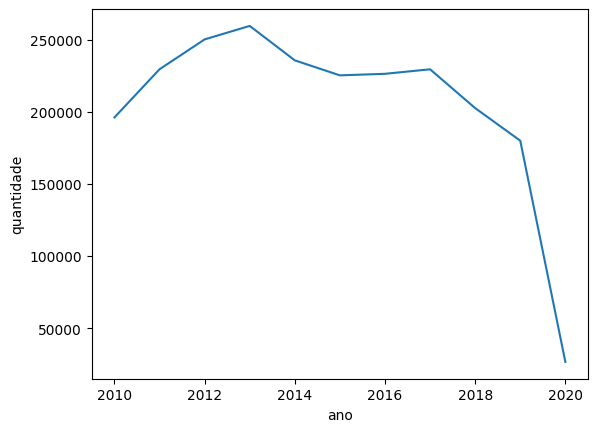

In [138]:
sns.lineplot(data = anos, y = 'quantidade', x = 'ano')

Existe um decrescimo de empréstimos mesmo antes do período da pandemia

#### Quantos emprestimos foram feitos por mês ?

In [202]:
emprestimo_mes = emprestimo_exemplares['data_emprestimo'].dt.month.value_counts().reset_index()
emprestimo_mes.columns = ['mes', 'quantidade']
emprestimo_mes

,mes,quantidade
0,Mar,275780
1,Aug,253099
2,Apr,230339
3,Sep,227147
4,Feb,226945
5,May,223233
6,Oct,206765
7,Nov,180909
8,Jun,151948
9,Jul,130812


In [201]:
datamap = {'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4, 'May': 5, 'Jun': 6, 'Jul': 7, 'Aug': 8, 'Sep': 9, 'Oct': 10, 'Nov': 11, 'Dec': 12}

In [203]:
emprestimo_mes.index = list(map(lambda x: datamap[x], emprestimo_mes['mes']))

In [204]:
emprestimo_mes = emprestimo_mes.sort_index()

In [205]:
emprestimo_mes

,mes,quantidade
1,Jan,72212
2,Feb,226945
3,Mar,275780
4,Apr,230339
5,May,223233
6,Jun,151948
7,Jul,130812
8,Aug,253099
9,Sep,227147
10,Oct,206765


<Axes: xlabel='mes', ylabel='quantidade'>

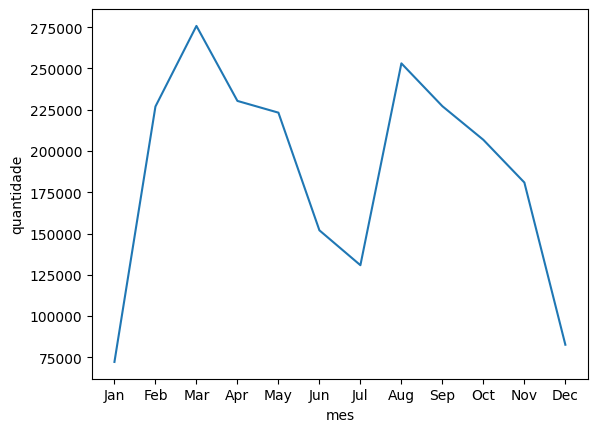

In [206]:
sns.lineplot(data = emprestimo_mes, y = 'quantidade', x = 'mes')

#### Qual é a quantidade de exemplares emprestados por hora?


In [213]:
emprestimo_exemplares['data_emprestimo'].dt.hour.value_counts()

16    226892
10    199592
17    197377
18    196678
11    189377
15    179570
14    162849
12    156142
20    153254
9     142595
13    135580
19    118964
8     112850
21     67849
7      21653
22       460
0         61
23        55
6         18
Name: hora_emprestimo, dtype: int64

In [265]:
h_r = emprestimo_exemplares['data_emprestimo'].dt.hour.value_counts().reset_index()
h_r.columns = ['hora', 'quantidade']
h_r.dropna(inplace=True)
h_r['hora'] = h_r['hora'].astype(int)

<Axes: xlabel='hora', ylabel='quantidade'>

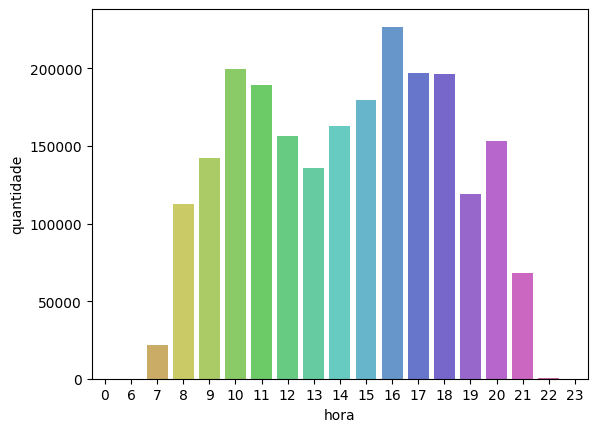

In [266]:
sns.barplot(data = h_r, y = 'quantidade', x = 'hora', palette = 'hls', linewidth = 2.5, capsize=.4)

#### Exemplares emprestados por dia da semana

In [277]:
dia = emprestimo_exemplares['data_emprestimo'].dt.strftime('%a').value_counts().reset_index()
dia.columns = ['dia', 'quantidade']
print(dia)

   dia  quantidade
0  Mon      497615
1  Tue      467369
2  Wed      445916
3  Thu      407976
4  Fri      394271
5  Sun       24902
6  Sat       23767


<Axes: xlabel='dia', ylabel='quantidade'>

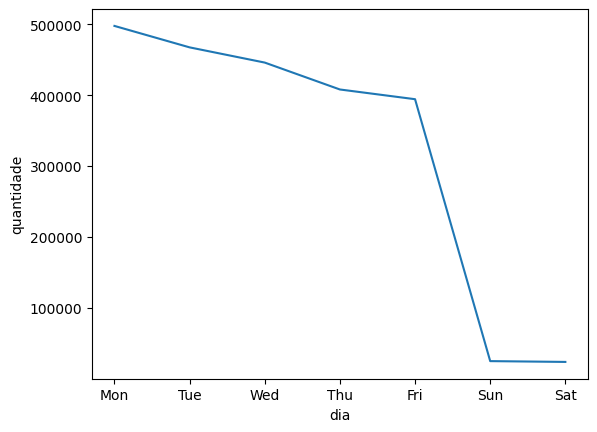

In [279]:
sns.lineplot(data = dia, y = 'quantidade', x = 'dia')

#### Como se distribuem os empréstimos de exemplares pelos tipos de vínculo dos usuários?

In [287]:
exemplares_tipo = emprestimo_exemplares['tipo_vinculo_usuario'].value_counts(normalize=True).reset_index()
exemplares_tipo.columns = ['tipo', 'percentual']
exemplares_tipo['percentual'] = exemplares_tipo['percentual']*100
exemplares_tipo

,tipo,percentual
0,ALUNO DE GRADUAÇÃO,78.341032
1,ALUNO DE PÓS-GRADUAÇÃO,14.151505
2,DOCENTE,3.461157
3,SERVIDOR TÉCNICO-ADMINISTRATIVO,1.511087
4,ALUNO MÉDIO/TÉCNICO,1.325882
5,DOCENTE EXTERNO,1.087887
6,USUÁRIO EXTERNO,0.121186
7,OUTROS,0.000265


#### Quais coleções são mais emprestadas?

In [295]:
colecao = emprestimo_exemplares['colecao'].value_counts(normalize=True).reset_index()
colecao.columns = ['colecao', 'percentual']
colecao['percentual'] = colecao['percentual']*100
colecao.drop(1, inplace=True)
colecao

,colecao,percentual
0,Acervo Circulante,90.774670
2,Multimeios,0.351664
3,Monografias,0.177778
4,Dissertações,0.106375
5,Obras de Referência,0.086391
6,Publicações de Autores do RN,0.038288
7,Publicações da UFRN,0.033778
8,Teses,0.031568
9,Folhetos,0.011982
10,Necessidades Educacionais Específicas,0.005748


#### De quais temas da CDU são os exemplares emprestados?

In [315]:
emprestimo_exemplares['CDU'].value_counts(normalize=True)

Ciências aplicadas                 0.630244
Ciências sociais                   0.163383
Generalidades                      0.111319
Matemática e ciências naturais     0.030394
Religião                           0.027542
Filosofia e psicologia             0.026777
Geografia. Biografia. História.    0.003532
Belas artes                        0.003498
Linguagem                          0.003311
Name: CDU, dtype: float64

In [316]:
temas = emprestimo_exemplares['CDU'].value_counts(normalize=True).reset_index()
temas.columns = ['CDU', 'percentual']
temas['percentual'] = temas['percentual']*100

<Axes: xlabel='percentual', ylabel='CDU'>

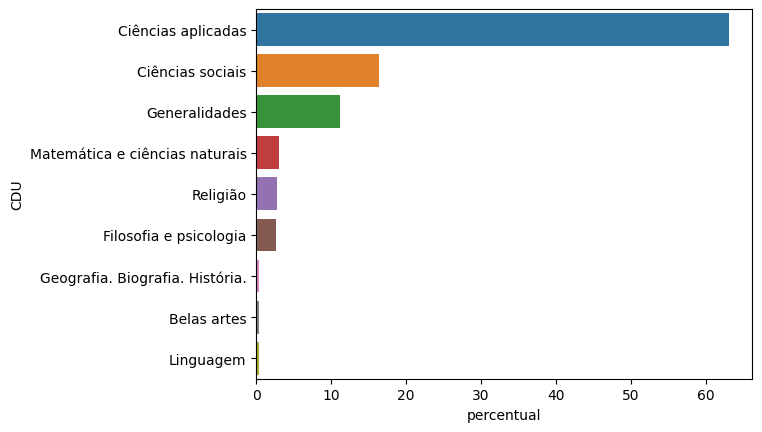

In [317]:
sns.barplot(data = temas, x = 'percentual', y = 'CDU')

#### Quais são as bibliotecas com mais ou menos quantidade de empréstimos?

In [319]:
bibliotecas = emprestimo_exemplares['biblioteca'].value_counts(normalize=True).reset_index()
bibliotecas.columns = ['biblioteca', 'percentual']
bibliotecas['percentual'] = bibliotecas['percentual']*100
bibliotecas.drop(1, inplace=True)
bibliotecas

,biblioteca,percentual
0,Biblioteca Central Zila Mamede,63.053228
2,Biblioteca Setorial do Centro Ciências da Saúd...,5.244282
3,Biblioteca Setorial da Faculdade de Ciências d...,3.431269
4,Biblioteca Setorial Prof. Alberto Moreira Camp...,2.937993
5,Biblioteca Setorial Profª. Maria Lúcia da Cost...,2.718081
6,Biblioteca Setorial Bertha Cruz Enders - ­Esco...,2.035533
7,Biblioteca Setorial do Centro de Ciências Huma...,1.801473
8,Biblioteca Setorial Dr. Paulo Bezerra - EMCM/R...,1.419081
9,Biblioteca Setorial Profª. Maria José Mamede G...,1.286090
10,Biblioteca Setorial Prof. Rodolfo Helinski - E...,1.203458


#### Exemplares x Alunos graduação

In [332]:
tipo_ano = emprestimo_exemplares.query('tipo_vinculo_usuario == "ALUNO DE GRADUAÇÃO"')
tipo_ano['data_emprestimo'].dt.strftime('%Y/%m').value_counts()

2012/03    26458
2013/04    24775
2013/02    24063
2015/03    23998
2011/08    23368
           ...  
2017/01     2771
2019/01     2408
2019/12     2087
2020/01     1859
2011/01     1102
Name: data_emprestimo, Length: 123, dtype: int64

In [349]:
tipo2 = tipo_ano['data_emprestimo'].dt.strftime('%Y/%m').value_counts().reset_index()
tipo2.columns = ['data_emprestimo', 'quantidade']
tipo2

,data_emprestimo,quantidade
0,2012/03,26458
1,2013/04,24775
2,2013/02,24063
3,2015/03,23998
4,2011/08,23368
...,...,...
118,2017/01,2771
119,2019/01,2408
120,2019/12,2087
121,2020/01,1859
